## Speed of Light

### Alexandra Higley

In [1]:
import numpy as np
from scipy.optimize import curve_fit
from pylab import *
from math import e
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy
from scipy import stats
from scipy.stats import norm

In [2]:
#Experimenter One Data

dist1 = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]) #m
trial1 = np.array([126, 134, 140, 148, 154, 158, 164, 170, 178, 184, 192, 198, 202, 214, 218]) #ns
trial2 = np.array([131, 133, 140, 152, 156, 159, 167, 169, 176, 182, 189, 202, 207, 207, 235])
trial3 = np.array([125, 136, 142, 145, 156, 159, 165, 169, 181, 182, 195, 194, 191, 221, 215])
trial4 = np.array([123, 133, 139, 132, 152, 160, 162, 172, 176, 184, 195, 196, 208, 216, 215])

trialm = (trial1 + trial2 + trial3 + trial4)/4

tot1 = (*trial1,*trial2,*trial3,*trial4)

In [3]:
def chauv(array):
    print(len(array))
    mu, sigma = scipy.stats.norm.fit(array)
    print(array)
    som = abs(mu+(2*sigma))
    optloc = np.where(som >= array)
    opt = array[optloc]
    print(optloc)
    print(len(opt))
    

In [4]:
#Experimenter Two Data

dist2 = np.array([2, 4, 8, 12, 16, 20])

top1 = np.array([128, 133, 151, 161, 167, 183]) #ns
top2 = np.array([127, 133, 149, 160, 170, 180])
top3 = np.array([127, 135, 148, 158, 170, 183])
top4 = np.array([131, 132, 147, 160, 170, 182])
top5 = np.array([132, 133, 148, 160, 166, 180])
top6 = np.array([129, 133, 147, 162, 169, 180])

topm = (top1 + top2 + top3 + top4 + top5 + top6)/6

bottom1 = np.array([132, 138, 153, 158, 150, 183]) #ns
bottom2 = np.array([134, 140, 152, 159, 159, 183])
bottom3 = np.array([130, 137, 152, 159, 164, 182])
bottom4 = np.array([129, 134, 150, 171, 163, 200])
bottom5 = np.array([124, 135, 151, 155, 163, 178])
bottom6 = np.array([124, 133, 149, 156, 161, 179])

bottomm = (bottom1 + bottom2 + bottom3 + bottom4 + bottom5 + bottom6)/6

In [5]:
def line1(x,m,b):
    y3 = m*x + b
    return y3

## Experimenter One

First I'm going to find the standard deviations on all the measurements for each distance

In [6]:
std1_2 = np.std([trial1[0],trial2[0],trial3[0],trial4[0]])
std1_4 = np.std([trial1[1],trial2[1],trial3[1],trial4[1]])
std1_6 = np.std([trial1[2],trial2[2],trial3[2],trial4[2]])
std1_8 = np.std([trial1[3],trial2[3],trial3[3],trial4[3]])
std1_10 = np.std([trial1[4],trial2[4],trial3[4],trial4[4]])
std1_12 = np.std([trial1[5],trial2[5],trial3[5],trial4[5]])
std1_14 = np.std([trial1[6],trial2[6],trial3[6],trial4[6]])
std1_16 = np.std([trial1[7],trial2[7],trial3[7],trial4[7]])
std1_18 = np.std([trial1[8],trial2[8],trial3[8],trial4[8]])
std1_20 = np.std([trial1[9],trial2[9],trial3[9],trial4[9]])
std1_22 = np.std([trial1[10],trial2[10],trial3[10],trial4[10]])
std1_24 = np.std([trial1[11],trial2[11],trial3[11],trial4[11]])
std1_26 = np.std([trial1[12],trial2[12],trial3[12],trial4[12]])
std1_28 = np.std([trial1[13],trial2[13],trial3[13],trial4[13]])
std1_30 = np.std([trial1[14],trial2[14],trial3[14],trial4[14]])

std1_all = np.array([std1_2,std1_4,std1_6,std1_8,std1_10,std1_12,std1_14,std1_16,std1_18,std1_20,std1_22,std1_24,std1_26,std1_28,std1_30])
print(std1_all)

std1_m = np.mean(std1_all)
print("\n",std1_m)



[2.94745653 1.22474487 1.08972474 7.49583218 1.6583124  0.70710678
 1.80277564 1.22474487 2.04633819 1.         2.48746859 2.95803989
 6.74536878 5.02493781 8.31790238]

 3.115383576530198


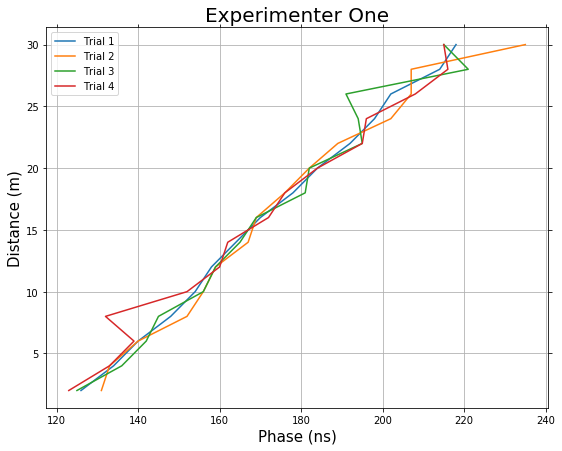

In [7]:
fig1,ax1 =plt.subplots(figsize=(9,7))

ax1.plot(trial1, dist1,label="Trial 1")
ax1.plot(trial2, dist1,label="Trial 2")
ax1.plot(trial3, dist1,label="Trial 3")
ax1.plot(trial4, dist1,label="Trial 4")

ax1.set_xlabel('Phase (ns)',fontsize=15)
ax1.set_ylabel('Distance (m)',fontsize=15)

ax1.tick_params(axis='both',which='minor',direction='in')
ax1.tick_params(top=True,right=True)
ax1.tick_params(which='minor',top=True,right=True)
ax1.grid()

ax1.set_title("Experimenter One", fontsize = 20)

plt.legend()
plt.show()

In [8]:
coeff1, covar_matrix1 = curve_fit(line1, trialm, dist1)
xarr1=np.linspace(np.min(trialm),np.max(trialm),1000)
yarr1=line1(xarr1,*coeff1)

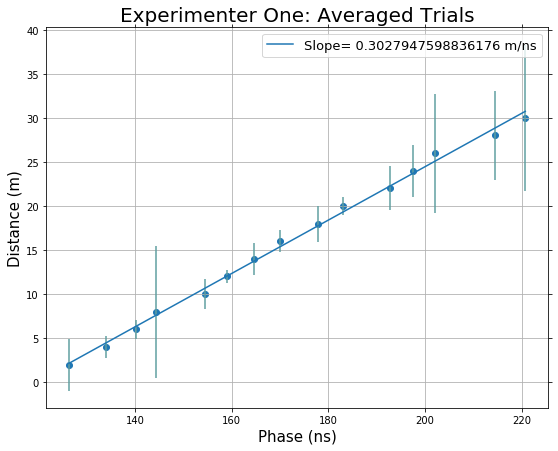

In [9]:
fig2,ax2 =plt.subplots(figsize=(9,7))

ax2.scatter(trialm, dist1)
ax2.plot(xarr1,yarr1)
ax2.errorbar(trialm, dist1, std1_all, linestyle='None', color="cadetblue")

ax2.set_xlabel('Phase (ns)',fontsize=15)
ax2.set_ylabel('Distance (m)',fontsize=15)

ax2.tick_params(axis='both',which='minor',direction='in')
ax2.tick_params(top=True,right=True)
ax2.tick_params(which='minor',top=True,right=True)
ax2.grid()

ax2.set_title("Experimenter One: Averaged Trials", fontsize = 20)

plt.legend(["Slope= {} m/ns".format(coeff1[0])],fontsize=13)
plt.show()

In [10]:
def getlight(x,y):
    coeff1, covar_matrix1 = curve_fit(line1, x, y)
    xarr1=np.linspace(np.min(x),np.max(x),1000)
    yarr1=line1(xarr1,*coeff1)
    return(coeff1[0])

In [11]:
ex1 = getlight(trial1,dist1)
ex2 = getlight(trial2,dist1)
ex3 = getlight(trial3,dist1)
ex4 = getlight(trial4,dist1)

extot = np.array([ex1,ex2,ex3,ex4])

print(np.mean(extot))

#chauv(extot)

0.29810014961072057


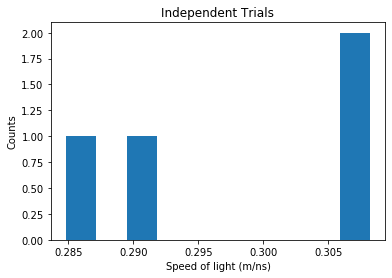

In [12]:
plt.hist(extot)
plt.title("Independent Trials")
plt.xlabel("Speed of light (m/ns)")
plt.ylabel("Counts");

Now I am going to calculate the propogation of error

In [13]:
av1_2 = np.mean([trial1[0],trial2[0],trial3[0],trial4[0]])
av1_4 = np.mean([trial1[1],trial2[1],trial3[1],trial4[1]])
av1_6 = np.mean([trial1[2],trial2[2],trial3[2],trial4[2]])
av1_8 = np.mean([trial1[3],trial2[3],trial3[3],trial4[3]])
av1_10 = np.mean([trial1[4],trial2[4],trial3[4],trial4[4]])
av1_12 = np.mean([trial1[5],trial2[5],trial3[5],trial4[5]])
av1_14 = np.mean([trial1[6],trial2[6],trial3[6],trial4[6]])
av1_16 = np.mean([trial1[7],trial2[7],trial3[7],trial4[7]])
av1_18 = np.mean([trial1[8],trial2[8],trial3[8],trial4[8]])
av1_20 = np.mean([trial1[9],trial2[9],trial3[9],trial4[9]])
av1_22 = np.mean([trial1[10],trial2[10],trial3[10],trial4[10]])
av1_24 = np.mean([trial1[11],trial2[11],trial3[11],trial4[11]])
av1_26 = np.mean([trial1[12],trial2[12],trial3[12],trial4[12]])
av1_28 = np.mean([trial1[13],trial2[13],trial3[13],trial4[13]])
av1_30 = np.mean([trial1[14],trial2[14],trial3[14],trial4[14]])

av1_all = np.array([av1_2,av1_4,av1_6,av1_8,av1_10,av1_12,av1_14,av1_16,av1_18,av1_20,av1_22,av1_24,av1_26,av1_28,av1_30])
print(av1_all)

[126.25 134.   140.25 144.25 154.5  159.   164.5  170.   177.75 183.
 192.75 197.5  202.   214.5  220.75]


In [14]:
def prp(d,t,stdt,stdd):
        y1 = np.sqrt(((1/t)*(stdd))**2)
        y2 = np.sqrt(((-d/(t**2))*(stdt))**2)
        y3 = y1+y2
        return y3

In [15]:
prp1 = prp(2,av1_2,std1_m,0.05)
prp2 = prp(4,av1_4,std1_m,0.05)
prp3 = prp(6,av1_6,std1_m,0.05)
prp4 = prp(8,av1_8,std1_m,0.05)
prp5 = prp(10,av1_10,std1_m,0.05)
prp6 = prp(12,av1_12,std1_m,0.05)
prp7 = prp(14,av1_14,std1_m,0.05)
prp8 = prp(16,av1_16,std1_m,0.05)
prp9 = prp(18,av1_18,std1_m,0.05)
prp10 = prp(20,av1_20,std1_m,0.05)
prp11 = prp(22,av1_22,std1_m,0.05)
prp12 = prp(24,av1_24,std1_m,0.05)
prp13 = prp(26,av1_26,std1_m,0.05)
prp14 = prp(28,av1_28,std1_m,0.05)
prp15 = prp(30,av1_30,std1_m,0.05)

prp_all = np.array([prp1,prp2,prp3,prp4,prp5,prp6,prp7,prp8,prp9,prp10,prp11,prp12,prp13,prp14,prp15])
prp_av = np.mean(prp_all)
print(prp_av) #propogation of error in m/ns

0.0018021374569690994


## Experimenter Two

Here I am finding standard deviations, similar to how I did for Experimenter One

In [16]:
std2_1a = np.std([top1[0],top2[0],top3[0],top4[0],top5[0],top6[0]])
std2_2a = np.std([top1[1],top2[1],top3[1],top4[1],top5[1],top6[1]])
std2_3a = np.std([top1[2],top2[2],top3[2],top4[2],top5[2],top6[2]])
std2_4a = np.std([top1[3],top2[3],top3[3],top4[3],top5[3],top6[3]])
std2_5a = np.std([top1[4],top2[4],top3[4],top4[4],top5[4],top6[4]])
std2_6a = np.std([top1[5],top2[5],top3[5],top4[5],top5[5],top6[5]])

std2_1b = np.std([bottom1[0],bottom2[0],bottom3[0],bottom4[0],bottom5[0],bottom6[0]])
std2_2b = np.std([bottom1[1],bottom2[1],bottom3[1],bottom4[1],bottom5[1],bottom6[1]])
std2_3b = np.std([bottom1[2],bottom2[2],bottom3[2],bottom4[2],bottom5[2],bottom6[2]])
std2_4b = np.std([bottom1[3],bottom2[3],bottom3[3],bottom4[3],bottom5[3],bottom6[3]])
std2_5b = np.std([bottom1[4],bottom2[4],bottom3[4],bottom4[4],bottom5[4],bottom6[4]])
std2_6b = np.std([bottom1[5],bottom2[5],bottom3[5],bottom4[5],bottom5[5],bottom6[5]])

std2a_all = np.array([std2_1a,std2_2a,std2_3a,std2_4a,std2_5a,std2_6a])
print(std2a_all)

std2b_all = np.array([std2_1b,std2_2b,std2_3b,std2_4b,std2_5b,std2_6b])
print(std2b_all)

std2a_av = np.mean(std2a_all)
std2b_av = np.mean(std2b_all)

print(std2a_av)
print(std2b_av)

[1.91485422 0.89752747 1.37436854 1.21335165 1.59861051 1.37436854]
[3.76017139 2.40947205 1.34370962 5.28099317 4.76095229 7.33522703]
1.3955134871829766
4.148420925207454


In [17]:
coeff2, covar_matrix2 = curve_fit(line1, topm, dist2)
xarr2=np.linspace(np.min(topm),np.max(topm),1000)
yarr2=line1(xarr2,*coeff2)

coeff3, covar_matrix3 = curve_fit(line1, bottomm, dist2)
xarr3=np.linspace(np.min(bottomm),np.max(bottomm),1000)
yarr3=line1(xarr3,*coeff3)

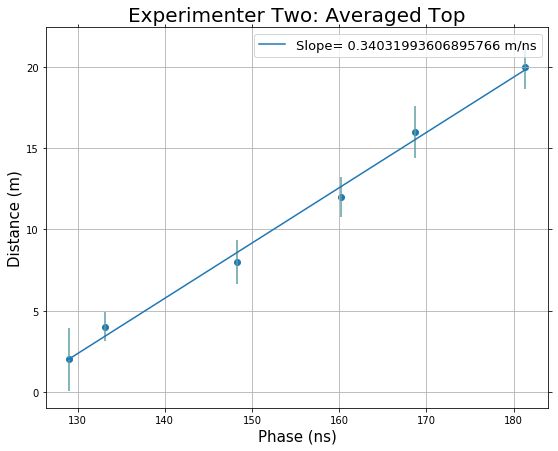

In [18]:
fig2,ax2 =plt.subplots(figsize=(9,7))

ax2.scatter(topm, dist2)
ax2.plot(xarr2,yarr2)
ax2.errorbar(topm, dist2, std2a_all, linestyle='None', color="cadetblue")

ax2.set_xlabel('Phase (ns)',fontsize=15)
ax2.set_ylabel('Distance (m)',fontsize=15)

ax2.tick_params(axis='both',which='minor',direction='in')
ax2.tick_params(top=True,right=True)
ax2.tick_params(which='minor',top=True,right=True)
ax2.grid()

ax2.set_title("Experimenter Two: Averaged Top", fontsize = 20)

plt.legend(["Slope= {} m/ns".format(coeff2[0])],fontsize=13)
plt.show()

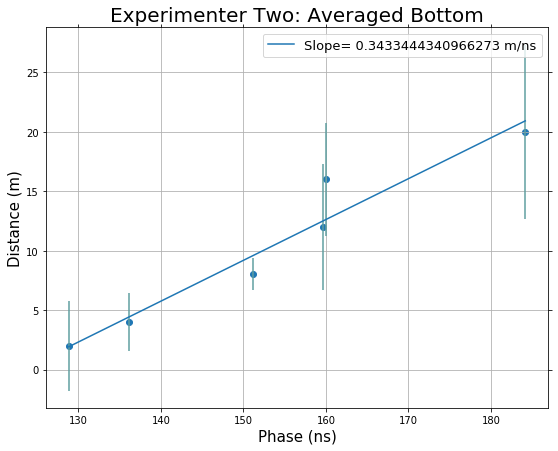

In [19]:
fig2,ax2 =plt.subplots(figsize=(9,7))

ax2.scatter(bottomm, dist2)
ax2.plot(xarr3,yarr3)
ax2.errorbar(bottomm, dist2, std2b_all, linestyle='None', color="cadetblue")

ax2.set_xlabel('Phase (ns)',fontsize=15)
ax2.set_ylabel('Distance (m)',fontsize=15)

ax2.tick_params(axis='both',which='minor',direction='in')
ax2.tick_params(top=True,right=True)
ax2.tick_params(which='minor',top=True,right=True)
ax2.grid()

ax2.set_title("Experimenter Two: Averaged Bottom", fontsize = 20)

plt.legend(["Slope= {} m/ns".format(coeff3[0])],fontsize=13)
plt.show()

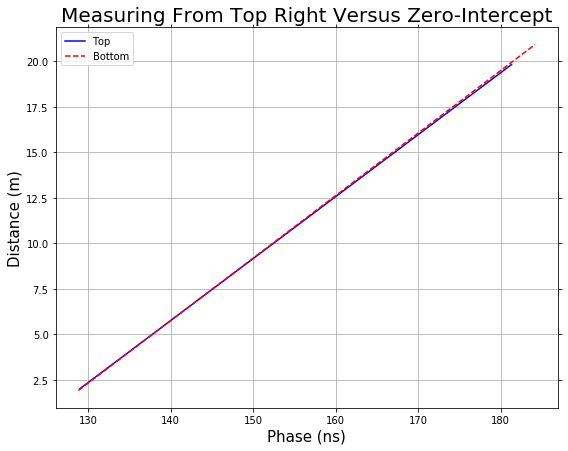

In [20]:
fig2,ax2 =plt.subplots(figsize=(9,7))

ax2.plot(xarr2,yarr2,label="Top",color="blue",linestyle="-")
ax2.plot(xarr3,yarr3,label="Bottom",color="red",linestyle="--")

ax2.set_xlabel('Phase (ns)',fontsize=15)
ax2.set_ylabel('Distance (m)',fontsize=15)

ax2.tick_params(axis='both',which='minor',direction='in')
ax2.tick_params(top=True,right=True)
ax2.tick_params(which='minor',top=True,right=True)
ax2.grid()

ax2.set_title("Measuring From Top Right Versus Zero-Intercept", fontsize = 20)

#plt.legend(["Slope= {} m/ns".format(coeff3[0])],fontsize=13)
plt.legend()
plt.show()

I am now determining the propogation of error for Experimenter Two's data. There are two different methods so I will have two different propogations. 

In [21]:
av2a_1 = np.mean([top1[0],top2[0],top3[0],top4[0],top5[0],top6[0]])
av2a_2 = np.mean([top1[1],top2[1],top3[1],top4[1],top5[1],top6[1]])
av2a_3 = np.mean([top1[2],top2[2],top3[2],top4[2],top5[2],top6[2]])
av2a_4 = np.mean([top1[3],top2[3],top3[3],top4[3],top5[3],top6[3]])
av2a_5 = np.mean([top1[4],top2[4],top3[4],top4[4],top5[4],top6[4]])
av2a_6 = np.mean([top1[5],top2[5],top3[5],top4[5],top5[5],top6[5]])

av2b_1 = np.mean([bottom1[0],bottom2[0],bottom3[0],bottom4[0],bottom5[0],bottom6[0]])
av2b_2 = np.mean([bottom1[1],bottom2[1],bottom3[1],bottom4[1],bottom5[1],bottom6[1]])
av2b_3 = np.mean([bottom1[2],bottom2[2],bottom3[2],bottom4[2],bottom5[2],bottom6[2]])
av2b_4 = np.mean([bottom1[3],bottom2[3],bottom3[3],bottom4[3],bottom5[3],bottom6[3]])
av2b_5 = np.mean([bottom1[4],bottom2[4],bottom3[4],bottom4[4],bottom5[4],bottom6[4]])
av2b_6 = np.mean([bottom1[5],bottom2[5],bottom3[5],bottom4[5],bottom5[5],bottom6[5]])

In [22]:
prp1a = prp(2,av2a_1,std2a_av,0.05)
prp2a = prp(2,av2a_2,std2a_av,0.05)
prp3a = prp(2,av2a_3,std2a_av,0.05)
prp4a = prp(2,av2a_4,std2a_av,0.05)
prp5a = prp(2,av2a_5,std2a_av,0.05)
prp6a = prp(2,av2a_6,std2a_av,0.05)

prp1b = prp(2,av2b_1,std2b_av,0.05)
prp2b = prp(2,av2b_2,std2b_av,0.05)
prp3b = prp(2,av2b_3,std2b_av,0.05)
prp4b = prp(2,av2b_4,std2b_av,0.05)
prp5b = prp(2,av2b_5,std2b_av,0.05)
prp6b = prp(2,av2b_6,std2b_av,0.05)

prp2a_all = np.array([prp1a,prp2a,prp3a,prp4a,prp5a,prp6a])
prp2a_av = np.mean(prp2a_all)
print(prp2a_av) #propogation of error in m/ns

prp2b_all = np.array([prp1b,prp2b,prp3b,prp4b,prp5b,prp6b])
prp2b_av = np.mean(prp2b_all)
print(prp2b_av) #propogation of error in m/ns

0.0004547069248906158
0.000697965295199438


In [23]:
topt1 = getlight(top1,dist2)
topt2 = getlight(top2,dist2)
topt3 = getlight(top3,dist2)
topt4 = getlight(top4,dist2)
topt5 = getlight(top5,dist2)
topt6 = getlight(top6,dist2)

toptot = np.array([topt1,topt2,topt3,topt4,topt5,topt6])

0.3391526350481844


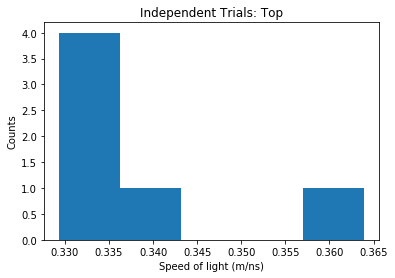

In [24]:
plt.hist(toptot,bins=5);
plt.title("Independent Trials: Top")
plt.xlabel("Speed of light (m/ns)")
plt.ylabel("Counts");
print(np.mean(toptot))

In [25]:
bott1 = getlight(bottom1,dist2)
bott2 = getlight(bottom2,dist2)
bott3 = getlight(bottom3,dist2)
bott4 = getlight(bottom4,dist2)
bott5 = getlight(bottom5,dist2)
bott6 = getlight(bottom6,dist2)

bottot = np.array([bott1,bott2,bott3,bott4,bott5,bott6])

0.3414607886368639


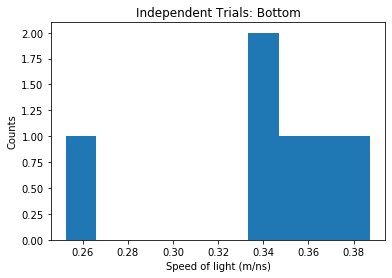

In [26]:
plt.hist(bottot);
plt.title("Independent Trials: Bottom")
plt.xlabel("Speed of light (m/ns)")
plt.ylabel("Counts");
print(np.mean(bottot))

In [27]:
counts1,bins1 = np.histogram(bottot, bins=4)
mu1, sigma1 = scipy.stats.norm.fit(bottot)

binmid1 = np.zeros(4,dtype='f4')
for i in range(4):
    binmid1[i] = (bins1[i+1]+bins1[i])/2.0
    
print('BIN EDGES: ', bins1[:-1])
print('BIN CENTERS: ', binmid1)
print('COUNTS: ', counts1)

BIN EDGES:  [0.25250812 0.28622567 0.31994322 0.35366077]
BIN CENTERS:  [0.2693669  0.30308443 0.336802   0.37051955]
COUNTS:  [1 0 3 2]


In [28]:
def line2(x,a1,mu,sig):
    y1 = 1 + a1*e**((-(x-mu)**2)/(2*sig**2))
    return y1

In [29]:
gg = np.mean(bottot)
st = np.std(bottot)

p1= np.array([0.34,st,10])
popt1, pcov1 = curve_fit(line2, binmid1, counts1, p0=p1)
xarr1 = np.linspace(np.min(bottot),np.max(bottot), 1000)
yarr1 = line2(xarr1, *popt1)

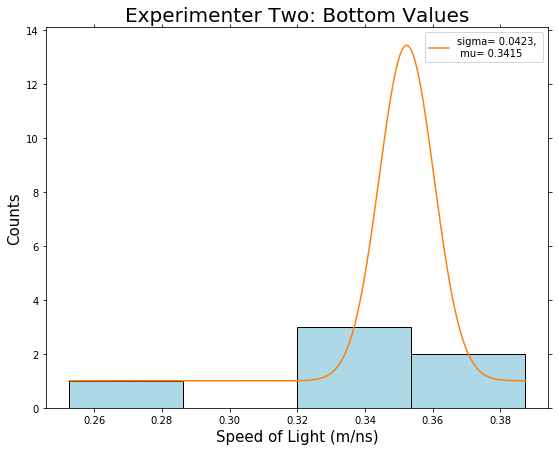

In [30]:
fig1,ax1 =plt.subplots(figsize=(9,7))
#ax2.hist(bins[:-1],bins, edgecolor='black', facecolor='cornflowerblue',weights=counts)
ax1.hist(bins1[:-1],bins1, edgecolor='black', facecolor='lightblue',weights=counts1)
ax1.plot(xarr1,yarr1)

ax1.set_xlabel('Speed of Light (m/ns)',fontsize=15)
ax1.set_ylabel('Counts',fontsize=15)

ax1.tick_params(axis='both',which='minor',direction='in')
ax1.tick_params(top=True,right=True)
ax1.tick_params(which='minor',top=True,right=True)

ax1.set_title("Experimenter Two: Bottom Values", fontsize = 20)
plt.legend(["sigma= {}, \n mu= {}".format(round(sigma1,4),round(mu1,4))])

plt.show()

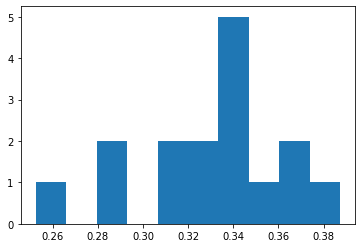

In [31]:
allsp = (*extot,*toptot,*bottot)

plt.hist(allsp);

In [32]:
counts1,bins1 = np.histogram(allsp, bins=5)
mu1, sigma1 = scipy.stats.norm.fit(allsp)

binmid1 = np.zeros(5,dtype='f4')
for i in range(5):
    binmid1[i] = (bins1[i+1]+bins1[i])/2.0
    
print('BIN EDGES: ', bins1[:-1])
print('BIN CENTERS: ', binmid1)
print('COUNTS: ', counts1)

BIN EDGES:  [0.25250812 0.27948216 0.3064562  0.33343024 0.36040428]
BIN CENTERS:  [0.26599514 0.29296917 0.31994322 0.34691724 0.3738913 ]
COUNTS:  [1 2 4 6 3]


In [33]:
st2 = np.std(allsp)

p1= np.array([0.34,st2,10])
popt1, pcov1 = curve_fit(line2, binmid1, counts1, p0=p1)
xarr1 = np.linspace(np.min(allsp),np.max(allsp), 1000)
yarr1 = line2(xarr1, *popt1)

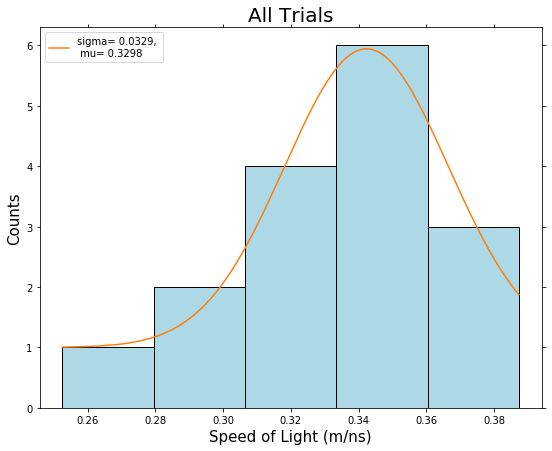

In [34]:
fig1,ax1 =plt.subplots(figsize=(9,7))
#ax2.hist(bins[:-1],bins, edgecolor='black', facecolor='cornflowerblue',weights=counts)
ax1.hist(bins1[:-1],bins1, edgecolor='black', facecolor='lightblue',weights=counts1)
ax1.plot(xarr1,yarr1)

ax1.set_xlabel('Speed of Light (m/ns)',fontsize=15)
ax1.set_ylabel('Counts',fontsize=15)

ax1.tick_params(axis='both',which='minor',direction='in')
ax1.tick_params(top=True,right=True)
ax1.tick_params(which='minor',top=True,right=True)

ax1.set_title("All Trials", fontsize = 20)
plt.legend(["sigma= {}, \n mu= {}".format(round(sigma1,4),round(mu1,4))])

plt.show()

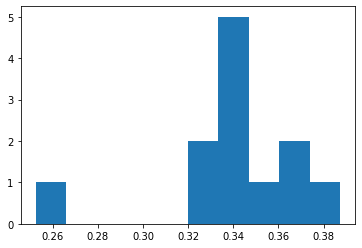

In [35]:
allsp_2 = (*toptot,*bottot)

plt.hist(allsp_2);

In [36]:
counts11,bins11 = np.histogram(allsp_2, bins=5)
mu11, sigma11 = scipy.stats.norm.fit(allsp_2)

binmid11 = np.zeros(5,dtype='f4')
for i in range(5):
    binmid11[i] = (bins11[i+1]+bins11[i])/2.0
    
print('BIN EDGES: ', bins11[:-1])
print('BIN CENTERS: ', binmid11)
print('COUNTS: ', counts11)

BIN EDGES:  [0.25250812 0.27948216 0.3064562  0.33343024 0.36040428]
BIN CENTERS:  [0.26599514 0.29296917 0.31994322 0.34691724 0.3738913 ]
COUNTS:  [1 0 2 6 3]


In [37]:
st3 = np.std(allsp_2)

p11= np.array([0.34,st3,10])
popt11, pcov11 = curve_fit(line2, binmid11, counts11, p0=p11)
xarr11 = np.linspace(np.min(allsp_2),np.max(allsp_2), 1000)
yarr11 = line2(xarr11, *popt11)

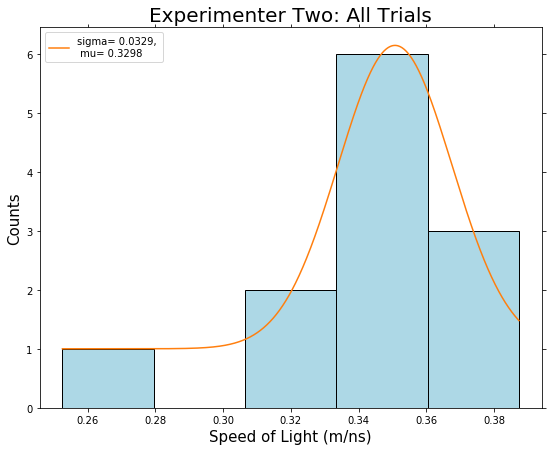

In [38]:
fig1,ax1 =plt.subplots(figsize=(9,7))
#ax2.hist(bins[:-1],bins, edgecolor='black', facecolor='cornflowerblue',weights=counts)
ax1.hist(bins11[:-1],bins11, edgecolor='black', facecolor='lightblue',weights=counts11)
ax1.plot(xarr11,yarr11)

ax1.set_xlabel('Speed of Light (m/ns)',fontsize=15)
ax1.set_ylabel('Counts',fontsize=15)

ax1.tick_params(axis='both',which='minor',direction='in')
ax1.tick_params(top=True,right=True)
ax1.tick_params(which='minor',top=True,right=True)

ax1.set_title("Experimenter Two: All Trials", fontsize = 20)
plt.legend(["sigma= {}, \n mu= {}".format(round(sigma1,4),round(mu1,4))])

plt.show()

In [39]:
print(np.mean(allsp_2))

0.3403067118425242
